In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('living-planet-index.csv', delimiter=';', )
df

,Region,Year,Average Index,Upper Index,Lower Index
0,Africa,1970,100.000000,100.000000,100.000000
1,Africa,1971,95.461969,104.910803,87.790567
2,Africa,1972,94.683413,110.867839,81.479839
3,Africa,1973,99.181174,120.870721,81.908753
4,Africa,1974,99.384934,127.877780,77.144610
...,...,...,...,...,...
337,World,2014,31.669021,38.071988,26.383458
338,World,2015,31.627531,38.068720,26.281212
339,World,2016,31.145408,37.562137,25.770213
340,World,2017,30.885270,37.343040,25.465452


In [3]:
region=df['Region']
pd.unique(region)

array(['Africa', 'Asia and Pacific', 'Europe and Central Asia',
       'Freshwater', 'Latin America and the Caribbean', 'North America',
       'World'], dtype=object)

In [4]:
#grouped=df.groupby('Region')
#africa=grouped.get_group('Africa')

def save_groupby(df, group_col):
    grouped=df.groupby('Region')
    groups=[]
    for name, group in grouped:
        groups.append(group)
    return tuple(groups)

africa, asia, euro, fresh, latin, nam, world=save_groupby(df, 'Region')


In [5]:
grouped=df.groupby('Region')

In [24]:
africa.tail()

,Region,Year,Average Index,Upper Index,Lower Index
44,Africa,2014,32.492869,68.628636,15.238575
45,Africa,2015,31.293573,66.256152,14.669147
46,Africa,2016,32.054221,68.026893,14.968882
47,Africa,2017,34.445875,73.43358,15.991854
48,Africa,2018,34.445875,73.433580,15.991854


In [6]:
for name, group_df in grouped:
    min_year=group_df['Year'].min()
    max_year=group_df['Year'].max()
    print("{} : {}-{}".format(name, min_year, max_year))

Africa : 1970-2017
Asia and Pacific : 1970-2018
Europe and Central Asia : 1970-2018
Freshwater : 1970-2018
Latin America and the Caribbean : 1970-2018
North America : 1970-2018
World : 1970-2018


In [7]:
for name, group in grouped:
    min_average=group['Average Index'].min()
    print('{} : {}'. format(name, min_average))

Africa : 31.2935728
Asia and Pacific : 43.9966301
Europe and Central Asia : 82.2915342
Freshwater : 17.1441894
Latin America and the Caribbean : 6.4136321
North America : 70.2641731
World : 30.8852702


In [8]:
df['Average Index'].idxmin()

243

In [9]:
df.loc[243, :]

Region           Latin America and the Caribbean
Year                                        2018
Average Index                           6.413632
Upper Index                            11.390088
Lower Index                             3.702799
Name: 243, dtype: object

In [10]:
df.dtypes

Region            object
Year               int64
Average Index    float64
Upper Index      float64
Lower Index      float64
dtype: object

In [11]:
region=df['Region']
year=df['Year']
av_ind=df['Average Index']
up_ind=df['Upper Index']
lo_ind=df['Lower Index']

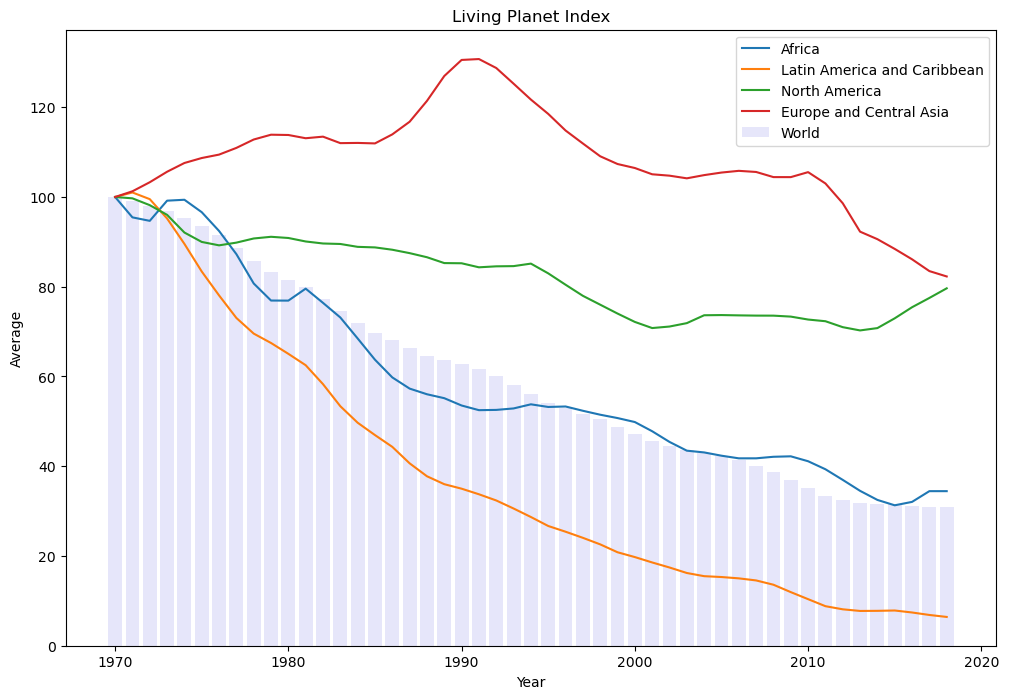

In [27]:
plt.figure(figsize=(12,8))
plt.title('Living Planet Index')
plt.xlabel('Year')
plt.ylabel('Average')
plt.plot(africa['Year'], africa['Average Index'])
plt.plot(latin['Year'], latin['Average Index'])
plt.plot(nam['Year'], nam['Average Index'])
plt.plot(euro['Year'], euro['Average Index'])
plt.bar(world['Year'], world['Average Index'], color='lavender')
plt.legend(['Africa', 'Latin America and Caribbean', 'North America', 'Europe and Central Asia', 'World'])